In [29]:
%matplotlib notebook

In [48]:
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import soundfile
import IPython
from scipy.signal import spectrogram, lfilter, freqz, tf2zpk

In [14]:
from scipy.io import wavfile
s, fs = sf.read('xpentr00.wav')
s=s*10

print(min(s),max(s))
t=np.arange(s.size)/fs

-0.4962158203125 0.92559814453125


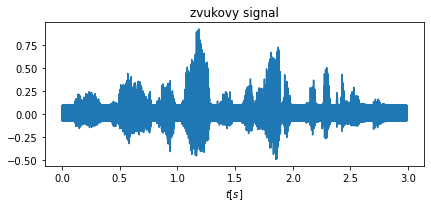

In [13]:
plt.figure(figsize=(6,3))
plt.plot(t, s)
plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('zvukovy signal')
plt.tight_layout()
IPython.display.display(IPython.display.Audio(s, rate=fs))


<IPython.core.display.Javascript object>


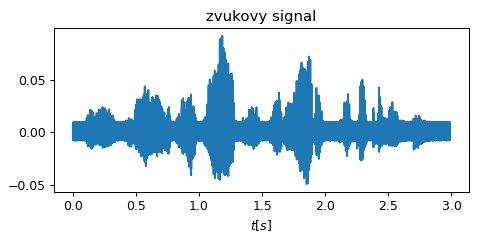

In [6]:
plt.figure(figsize=(6,3))
plt.plot(t, s)
plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('zvukovy signal')
plt.tight_layout()

<IPython.core.display.Javascript object>


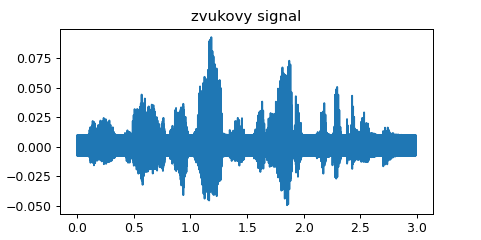

-8.880205493802354e-20
-0.04960217358927857
0.09257922289509643
[-0.00690808  0.00041614  0.00841174 ...  0.00072131  0.00563464
  0.00453601]


In [7]:
IPython.display.display(IPython.display.Audio(s, rate=fs))
plt.figure(figsize=(6,3))
plt.plot(t, s)
plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('zvukovy signal')
print(np.mean(s))
print(s.min()),print(s.max())
print(s)

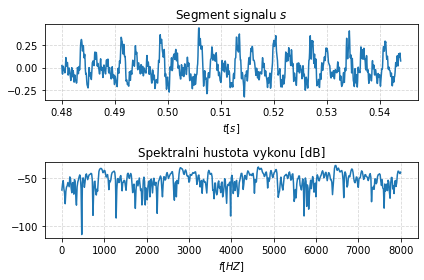

In [16]:
T
frame=0
i=0
frames=[]
while(frame+1024<s.size):
    odkud_vzorky = frame
    pokud_vzorky = frame + 1024
    s_seg=s[odkud_vzorky:pokud_vzorky]    
    frames.append(s_seg)
    frame=frame+512
    i=i+1
frames=np.asarray(frames)
N=1024

s_seg_spec=np.fft.fft(frames[17])
_, ax = plt.subplots(2,1)
ax[0].plot((np.arange(frames[17].size) + 15*512)/fs,frames[17])
ax[0].set_xlabel('$t[s]$')
ax[0].set_title('Segment signalu $s$')
ax[0].grid(alpha=0.5, linestyle='--')

plt.tight_layout()
G=10*np.log10(1/N * np.abs(frames[17])**2)
f=np.arange(G.size)/N*fs
ax[1].plot(f[:f.size//2+1],G[:G.size//2+1])
ax[1].set_xlabel('$f[HZ]$')
ax[1].set_title('Spektralni hustota vykonu [dB]')
ax[1].grid(alpha=0.5,linestyle='--')
plt.tight_layout()
IPython.display.display(IPython.display.Audio(frames[17], rate=fs))


In [9]:
f, t, sgr = spectrogram(s, fs,nperseg=1024,noverlap = 512)
sqr_log = 10 * np.log10(sgr+1e-20) 

In [25]:
plt.figure(figsize=(9,3))
#plt.ylim(900, 1000)
plt.pcolormesh(t,f,sqr_log)
plt.gca().set_xlabel('Cas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektralni hustota vykonu [dB]',rotation=270,labelpad=15)
plt.tight_layout()

NameError: name 'sqr_log' is not defined

<Figure size 648x216 with 0 Axes>

In [26]:
pocet_vzorkov=np.arange(s.size)/fs
print(pocet_vzorkov)
cos1 = np.cos(2 * np.pi * 920 * pocet_vzorkov)
cos2 = np.cos(2 * np.pi * 1840 * pocet_vzorkov)
cos3 = np.cos(2 * np.pi * 2760 * pocet_vzorkov)
cos4 = np.cos(2 * np.pi * 3680 * pocet_vzorkov)

cos_total = cos1 + cos2 + cos3 + cos4
print(cos_total)

[0.0000000e+00 6.2500000e-05 1.2500000e-04 ... 2.9886250e+00 2.9886875e+00
 2.9887500e+00]
[ 4.          2.27881815 -0.65522224 ... -0.22382073 -0.95127748
 -0.75476272]


In [43]:
f, t, sgr = spectrogram(cos_total, fs,nperseg=1024,noverlap = 512)
sqr_log = 10 * np.log10(sgr+1e-20) 

/tmp/ipykernel_22165/3195973278.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t,f,sqr_log)


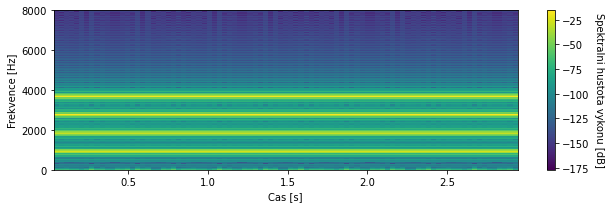

In [44]:
plt.figure(figsize=(9,3))
plt.pcolormesh(t,f,sqr_log)
plt.gca().set_xlabel('Cas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektralni hustota vykonu [dB]',rotation=270,labelpad=15)
plt.tight_layout()

In [29]:
IPython.display.display(IPython.display.Audio(cos_total, rate=fs))
sf.write('4cos.wav',cos_total,fs)

In [30]:
#wp=[(920-50)/(0.5*fs),(920+50)/(0.5*fs)]
#ws=[(920-20)/(0.5*fs),(920+20)/(0.5*fs)]
N ,wn =sc.signal.buttord([(920-50)/(0.5*fs),(920+50)/(0.5*fs)],[(920-20)/(0.5*fs),(920+20)/(0.5*fs)],3,40)
N2 ,wn2 =sc.signal.buttord([(1840-50)/(0.5*fs),(1840+50)/(0.5*fs)],[(1840-20)/(0.5*fs),(1840+20)/(0.5*fs)],3,40)
N3 ,wn3 =sc.signal.buttord([(2760-50)/(0.5*fs),(2760+50)/(0.5*fs)],[(2760-20)/(0.5*fs),(2760+20)/(0.5*fs)],3,40)
N4 ,wn4 =sc.signal.buttord([(3680-50)/(0.5*fs),(3680+50)/(0.5*fs)],[(3680-20)/(0.5*fs),(3680+20)/(0.5*fs)],3,40)

In [31]:
b1,a1 = sc.signal.butter(N,wn,'bandstop')
b2,a2 = sc.signal.butter(N2,wn2,'bandstop')
b3,a3 = sc.signal.butter(N3,wn3,'bandstop')
b4,a4 = sc.signal.butter(N4,wn4,'bandstop')

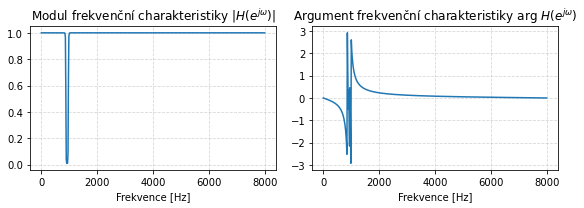

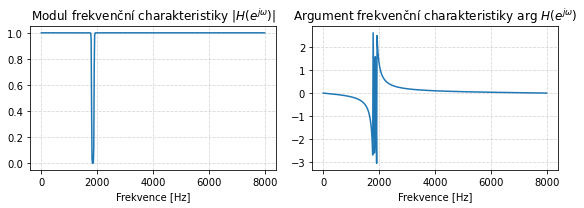

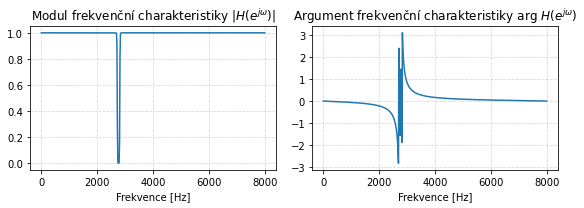

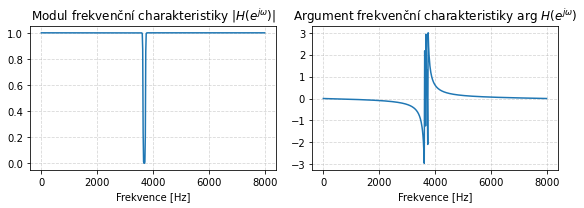

In [32]:
w1, H1 = freqz(b1,a1)
w2,H2=freqz(b2,a2)
w3,H3=freqz(b3,a3)
w4,H4=freqz(b4,a4)



_, ax = plt.subplots(1, 2, figsize=(8,3))

ax[0].plot(w1/ 2 / np.pi * fs, np.abs(H1))
ax[0].set_xlabel('Frekvence [Hz]')
ax[0].set_title('Modul frekvenční charakteristiky $|H(e^{j\omega})|$')

ax[1].plot(w1 / 2 / np.pi * fs, np.angle(H1))
ax[1].set_xlabel('Frekvence [Hz]')
ax[1].set_title('Argument frekvenční charakteristiky $\mathrm{arg}\ H(e^{j\omega})$')

for ax1 in ax:
    ax1.grid(alpha=0.5, linestyle='--')

plt.tight_layout()



_, ax = plt.subplots(1, 2, figsize=(8,3))

ax[0].plot(w2/ 2 / np.pi * fs, np.abs(H2))
ax[0].set_xlabel('Frekvence [Hz]')
ax[0].set_title('Modul frekvenční charakteristiky $|H(e^{j\omega})|$')

ax[1].plot(w2 / 2 / np.pi * fs, np.angle(H2))
ax[1].set_xlabel('Frekvence [Hz]')
ax[1].set_title('Argument frekvenční charakteristiky $\mathrm{arg}\ H(e^{j\omega})$')

for ax1 in ax:
    ax1.grid(alpha=0.5, linestyle='--')

plt.tight_layout()




_, ax = plt.subplots(1, 2, figsize=(8,3))

ax[0].plot(w3 / 2 / np.pi * fs, np.abs(H3))
ax[0].set_xlabel('Frekvence [Hz]')
ax[0].set_title('Modul frekvenční charakteristiky $|H(e^{j\omega})|$')

ax[1].plot(w3 / 2 / np.pi * fs, np.angle(H3))
ax[1].set_xlabel('Frekvence [Hz]')
ax[1].set_title('Argument frekvenční charakteristiky $\mathrm{arg}\ H(e^{j\omega})$')

for ax1 in ax:
    ax1.grid(alpha=0.5, linestyle='--')

plt.tight_layout()




_, ax = plt.subplots(1, 2, figsize=(8,3))

ax[0].plot(w4 / 2 / np.pi * fs, np.abs(H4))
ax[0].set_xlabel('Frekvence [Hz]')
ax[0].set_title('Modul frekvenční charakteristiky $|H(e^{j\omega})|$')

ax[1].plot(w4 / 2 / np.pi * fs, np.angle(H4))
ax[1].set_xlabel('Frekvence [Hz]')
ax[1].set_title('Argument frekvenční charakteristiky $\mathrm{arg}\ H(e^{j\omega})$')

for ax1 in ax:
    ax1.grid(alpha=0.5, linestyle='--')

plt.tight_layout()



In [33]:
z, p, k = tf2zpk(b1, a1)
z2, p2, k2 = tf2zpk(b2, a2)
z3, p3, k3 = tf2zpk(b3, a3)
z4, p4, k4 = tf2zpk(b4, a4)


/tmp/ipykernel_22165/3552533284.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t,f,sfgr_log)


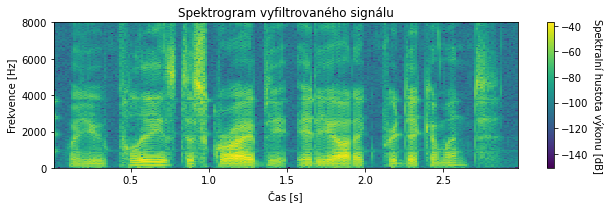

In [34]:

sf = lfilter(b1,a1,s)


sf = lfilter(b2,a2,sf)


sf = lfilter(b3,a3,sf)


sf = lfilter(b4,a4,sf)


f, t, sfgr = spectrogram(sf, fs)
sfgr_log = 10 * np.log10(sfgr+1e-20)



plt.figure(figsize=(9,3))
plt.pcolormesh(t,f,sfgr_log)
plt.gca().set_title('Spektrogram vyfiltrovaného signálu')
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)

plt.tight_layout()

IPython.display.display(IPython.display.Audio(sf, rate=fs))




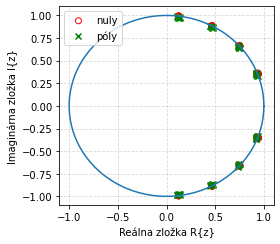

In [35]:
plt.figure(figsize=(4,3.5))

ang = np.linspace(0, 2*np.pi,100)
plt.plot(np.cos(ang),np.sin(ang))
plt.scatter(np.real(z),np.imag(z),marker='o',facecolors='none',edgecolors='r',label='nuly')
plt.scatter(np.real(p),np.imag(p),marker='x',color='g',label='póly')

plt.scatter(np.real(z2),np.imag(z2),marker='o',facecolors='none',edgecolors='r')
plt.scatter(np.real(p2),np.imag(p2),marker='x',color='g')

plt.scatter(np.real(z3),np.imag(z3),marker='o',facecolors='none',edgecolors='r')
plt.scatter(np.real(p3),np.imag(p3),marker='x',color='g')

plt.scatter(np.real(z4),np.imag(z4),marker='o',facecolors='none',edgecolors='r')
plt.scatter(np.real(p4),np.imag(p4),marker='x',color='g')

plt.gca().set_xlabel('Reálna zložka R{z}')
plt.gca().set_ylabel('Imaginárna zložka I{z}')

plt.grid(alpha=0.5,linestyle='--')
plt.legend(loc='upper left')

plt.tight_layout()

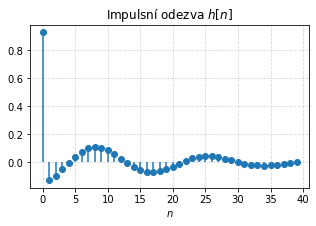

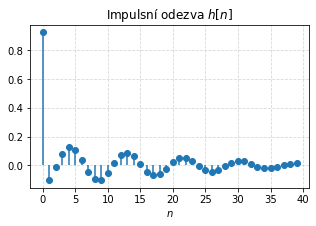

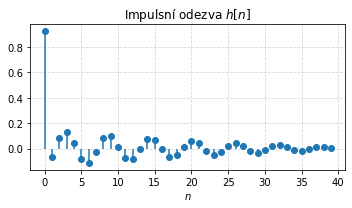

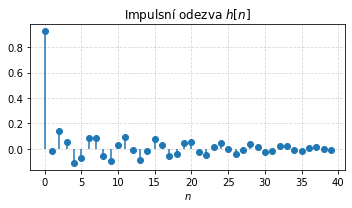

In [36]:
N_imp=40
imp=[1,*np.zeros(N_imp-1)]#jednotkovy impulz
h1=lfilter(b1,a1,imp)
h2=lfilter(b2,a2,imp)
h3=lfilter(b3,a3,imp)
h4=lfilter(b4,a4,imp)

plt.figure(figsize=(5,3))
plt.stem(np.arange(N_imp), h1, basefmt=' ')
plt.gca().set_xlabel('$n$')
plt.gca().set_title('Impulsní odezva $h[n]$')
plt.grid(alpha=0.5, linestyle='--')

plt.figure(figsize=(5,3))
plt.stem(np.arange(N_imp), h2, basefmt=' ')
plt.gca().set_xlabel('$n$')
plt.gca().set_title('Impulsní odezva $h[n]$')
plt.grid(alpha=0.5, linestyle='--')

plt.figure(figsize=(5,3))
plt.stem(np.arange(N_imp), h3, basefmt=' ')
plt.gca().set_xlabel('$n$')
plt.gca().set_title('Impulsní odezva $h[n]$')
plt.grid(alpha=0.5, linestyle='--')

plt.tight_layout()
plt.figure(figsize=(5,3))
plt.stem(np.arange(N_imp), h4, basefmt=' ')
plt.gca().set_xlabel('$n$')
plt.gca().set_title('Impulsní odezva $h[n]$')

plt.grid(alpha=0.5, linestyle='--')

plt.tight_layout()

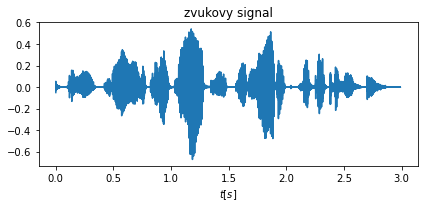

In [42]:
plt.figure(figsize=(6,3))
plt.plot(np.arange(sf.size)/fs, sf)
plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('zvukovy signal')
plt.tight_layout()

In [49]:
soundfile.write('clean_bandstop.wav',sf,fs)

IndexError: tuple index out of range